In [135]:
import functools
import os
import time
from absl import app
from absl import flags
from absl import logging
import numpy as np
import mnist_model  # ADDED
# REMOVED from experimental.mimo import cifar_model  # local file import
import robustness_metrics as rm
import tensorflow as tf
import tensorflow_datasets as tfds
import uncertainty_baselines as ub
import baselines.utils_new as utils  # ADDED this!
# from uncertainty_baselines.baselines.cifar import utils
import uncertainty_metrics as um


import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python.summary.summary_iterator import summary_iterator

In [22]:
from tensorboard.backend.event_processing import event_accumulator
ea = event_accumulator.EventAccumulator('/Users/benna/Desktop/DLA/OOD-detection-using-MIMO/MNIST_NN/M1/summaries/events.out.tfevents.1637871015.deeplearning-1-vm.9861.0.v2')
ea.Reload()
ea.Tags()


{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': [],
 'distributions': [],
 'tensors': ['train/negative_log_likelihood',
  'train/accuracy',
  'train/loss',
  'train/ece',
  'test/negative_log_likelihood',
  'test/accuracy',
  'test/ece',
  'test/diversity/disagreement',
  'test/diversity/average_kl',
  'test/diversity/cosine_similarity',
  'test/nll_member_0',
  'test/accuracy_member_0',
  'test/ms_per_example',
  'test/nll_mean_corrupted',
  'test/kl_mean_corrupted',
  'test/elbo_mean_corrupted',
  'test/accuracy_mean_corrupted',
  'test/ece_mean_corrupted',
  'test/member_acc_mean_corrupted',
  'test/member_ece_mean_corrupted',
  'test/nll_mean_1',
  'test/kl_mean_1',
  'test/elbo_mean_1',
  'test/accuracy_mean_1',
  'test/ece_mean_1',
  'test/nll_median_1',
  'test/kl_median_1',
  'test/elbo_median_1',
  'test/accuracy_median_1',
  'test/ece_median_1',
  'test/member_acc_mean_1',
  'test/member_ece_mean_1'],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [72]:

TAG_NAME = "test/accuracy"

value_list = []
for e in a:
    for v in e.summary.value:
        if v.tag == TAG_NAME:
            value = tf.make_ndarray(v.tensor)
            value_list.append(value)
acc_tot =value_list

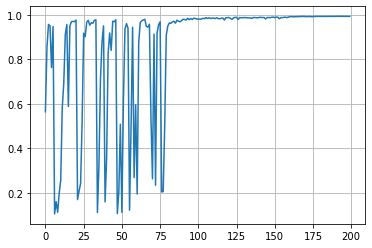

In [73]:
plt.plot(acc_tot)
plt.grid()
plt.show()


C:\Users\benna\miniconda3\envs\DAL\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\benna\miniconda3\envs\DAL\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\benna\miniconda3\envs\DAL\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

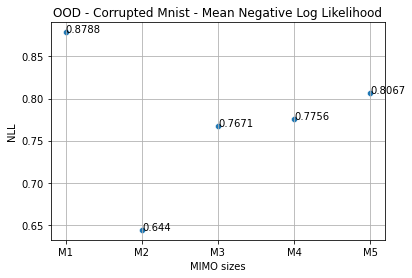

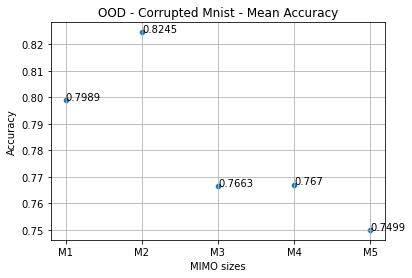

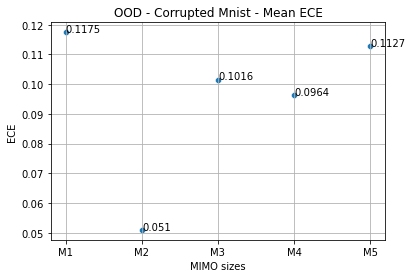

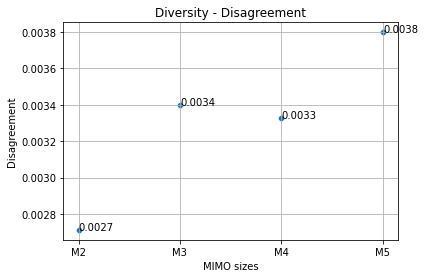

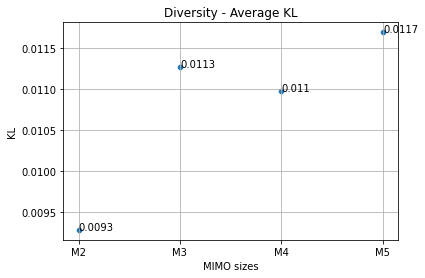

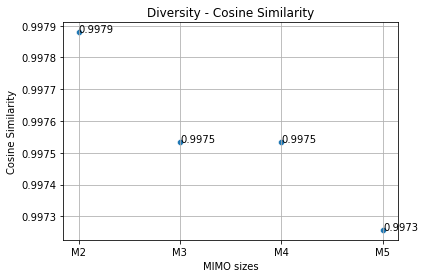

In [213]:


root_dir="/Users/benna/Desktop/DLA/OOD-detection-using-MIMO/MNIST_NN"
MNIST_RESULTS={}
# Ensembles = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6','M10']
Ensembles = ['M1', 'M2', 'M3', 'M4', 'M5']
for m in Ensembles:
    path_to_file=os.path.join(root_dir,m,"summaries")
    file = os.path.join(path_to_file, os.listdir(path_to_file)[0])
    a = summary_iterator(file)
    M={}
    for e in a:
        for v in e.summary.value:
            try:
                value=M[v.tag]
                value.append(tf.make_ndarray(v.tensor) if not np.isnan(tf.make_ndarray(v.tensor) ) else 0.0 )
                M[v.tag] = value
            except:
                M[v.tag]=[tf.make_ndarray(v.tensor) if not np.isnan(tf.make_ndarray(v.tensor) ) else 0.0]
    MNIST_RESULTS[m] = M 

metrics=   [ 'test/nll_mean_corrupted','test/accuracy_mean_corrupted', 'test/ece_mean_corrupted','test/diversity/disagreement',
            'test/diversity/average_kl','test/diversity/cosine_similarity']
titles= ['OOD - Corrupted Mnist - Mean Negative Log Likelihood','OOD - Corrupted Mnist - Mean Accuracy',
     'OOD - Corrupted Mnist - Mean ECE','Diversity - Disagreement',
            'Diversity - Average KL','Diversity - Cosine Similarity']
Y= ["NLL", "Accuracy", "ECE", "Disagreement", "KL", "Cosine Similarity"]


interesting_results = {}
for m in metrics:
    interesting_results[m]=np.zeros((len(Ensembles),len(MNIST_RESULTS['M3'][m])))

for i,  result  in enumerate(MNIST_RESULTS.items()):
    m, result = result
    for metric in metrics:
        interesting_results[metric][i] = result[metric]

for i, results in enumerate(interesting_results.items()):
    metric, result = results
    plt.figure()
    plt.grid()
    if metric in ['test/diversity/disagreement','test/diversity/average_kl','test/diversity/cosine_similarity']:

        sns.scatterplot(Ensembles[1:],result[1:,-1])
        for j, txt in enumerate(result[1:,-1]):
            plt.annotate( round(txt, 4), (j, txt), xycoords="data")
    else:
        sns.scatterplot(Ensembles,result[:,-1])
        for j, txt in enumerate(result[:,-1]):
            plt.annotate( round(txt, 4), (j, txt), xycoords="data")

    plt.xlabel("MIMO sizes")
    plt.ylabel(Y[i])
    plt.title(titles[i])
    plt.plot()
    plt.savefig(titles[i]+'.png', dpi=1000, bbox_inches= 'tight')